In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import optuna 

/home/sonya/Documents/projet_perso/student_performance/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("Student_Performance.csv")
df.sample(45)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2879,8,64,Yes,9,6,65.0
5976,7,47,No,8,8,41.0
4150,4,51,Yes,9,8,34.0
6065,5,79,No,9,8,64.0
8588,8,79,Yes,7,9,77.0
6199,5,42,Yes,7,3,32.0
3878,4,60,Yes,6,0,42.0
6780,7,59,Yes,6,6,54.0
182,1,95,No,8,6,72.0
1075,1,79,Yes,7,7,56.0


In [3]:
len(df)

10000

In [4]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(127)

In [6]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.replace({"Yes": 1,"No":0})
df.sample(5)

/tmp/ipykernel_1512655/2958951272.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1,"No":0})


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5321,6,92,0,4,9,79.0
9292,7,93,1,5,7,85.0
6200,7,56,0,4,5,46.0
5437,7,94,1,7,4,86.0
7381,9,46,0,4,4,40.0


In [9]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [10]:
matrice_correlation = df.corr()

<Axes: >

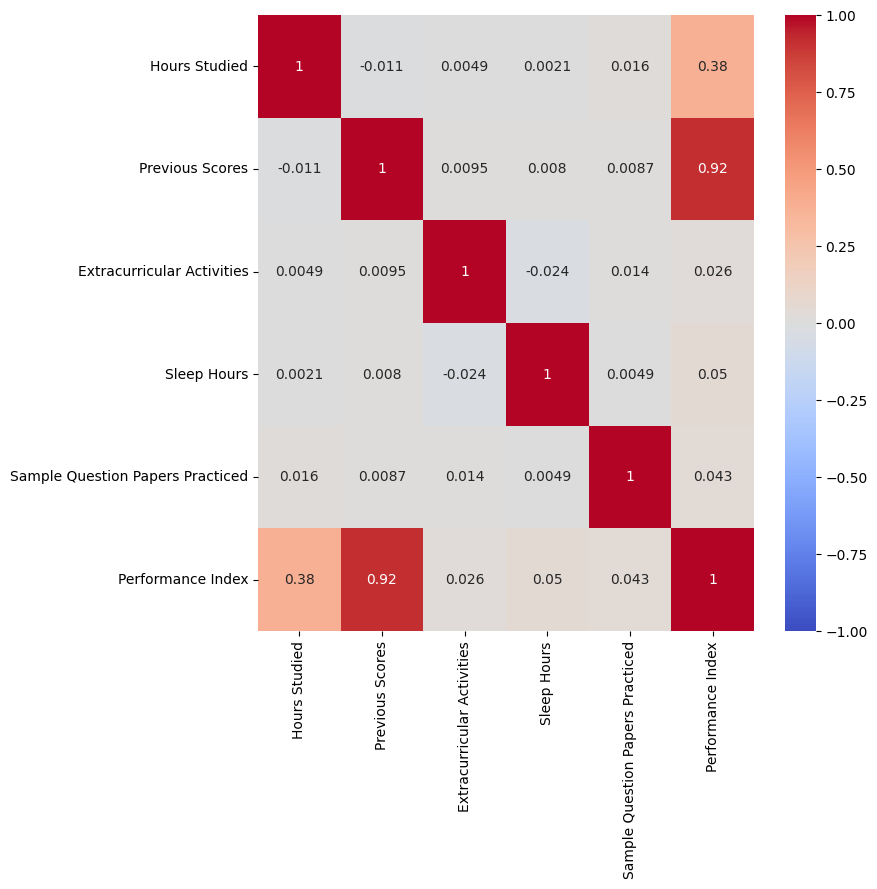

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(matrice_correlation,annot=True, cmap = "coolwarm" , vmin = -1,vmax = 1)

In [12]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [13]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
model = XGBRegressor()

In [16]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
def objective(trial):
    params = {
        
       
        #'learning_rate': trial.suggest_float('learning_rate',0.1,2),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'n_estimators':trial.suggest_int('n_estimators',100,300),
        'eta':trial.suggest_float('eta',0.1,2),
        'subsample':trial.suggest_float('subsample',0.1,1),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.1,1)

    }
    
    # Construction du modèle XGBoost
    model = XGBRegressor(**params)
    
    # Entraînement et évaluation
    model.fit(X_train, y_train)
    
    # Prédiction et calcul de la métrique
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    
    return mse

In [18]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-06-27 17:08:26,563] A new study created in memory with name: no-name-bad5ca9a-7fb5-495f-a91e-a616ebb1613c
[I 2024-06-27 17:08:26,978] Trial 0 finished with value: 12.388924400210511 and parameters: {'max_depth': 3, 'n_estimators': 291, 'eta': 1.3802728235330315, 'subsample': 0.23770470223118687, 'colsample_bytree': 0.6000777796974849}. Best is trial 0 with value: 12.388924400210511.
[I 2024-06-27 17:08:27,374] Trial 1 finished with value: 8.287058782185065 and parameters: {'max_depth': 4, 'n_estimators': 124, 'eta': 1.472045315921831, 'subsample': 0.5162355759863638, 'colsample_bytree': 0.706216023955901}. Best is trial 1 with value: 8.287058782185065.
[I 2024-06-27 17:08:28,355] Trial 2 finished with value: 2303.070022364909 and parameters: {'max_depth': 7, 'n_estimators': 260, 'eta': 1.9895698014555996, 'subsample': 0.1368887817070038, 'colsample_bytree': 0.2107501760650501}. Best is trial 1 with value: 8.287058782185065.
[I 2024-06-27 17:08:29,065] Trial 3 finished with valu

In [19]:
best_params = study.best_params
best_score = study.best_value

best_params,best_score

({'max_depth': 7,
  'n_estimators': 150,
  'eta': 0.41929252451739796,
  'subsample': 0.6544008031059949,
  'colsample_bytree': 0.26631822434118485},
 4.329514823180371)

In [20]:
# Créer un nouveau modèle avec les meilleurs hyperparamètres
best_model = XGBRegressor(**best_params)

# Entraîner le meilleur modèle sur l'ensemble d'entraînement complet
best_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluer les performances sur l'ensemble de test (par exemple, calculer le RMSE)
mse = mean_squared_error(y_pred,y_test)
mse

np.float64(4.329514823180371)